In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', low_memory=False, parse_dates=['Date'])

In [3]:
df[['Store', 'Date', 'Sales']].head(3)

,Store,Date,Sales
0,1,2015-07-31,5263
1,2,2015-07-31,6064
2,3,2015-07-31,8314


In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

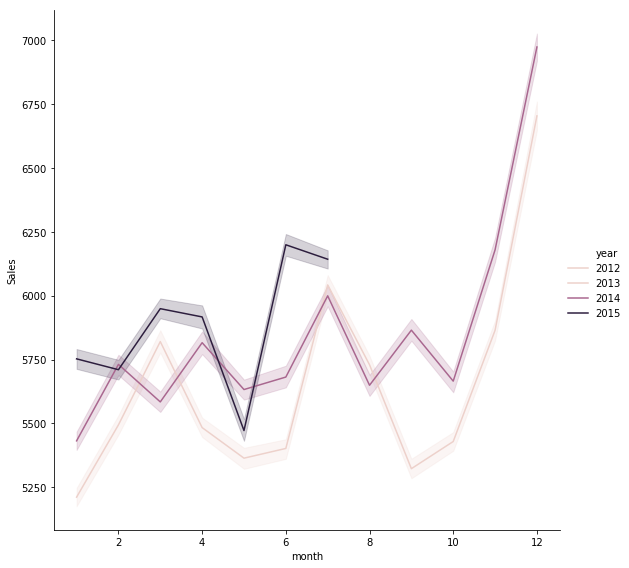

In [6]:
sns.relplot(x='month', y='Sales', hue='year', kind='line', data=df, height=8)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
df = df.join(pd.get_dummies(df['Date'].dt.weekday_name))

In [10]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [11]:
X_train, y_train = df.loc[df['Date'] < '2015-01-01', weekdays], df.loc[df['Date'] < '2015-01-01', 'Sales']
X_test, y_test = df.loc[df['Date'] >= '2015-01-01', weekdays], df.loc[df['Date'] >= '2015-01-01', ['Date', 'Sales']]

In [12]:
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [13]:
y_test['sales_predicted'] = regressor.predict(X_test)

In [14]:
y_test = y_test.melt(id_vars=['Date'], value_vars=['Sales', 'sales_predicted'])

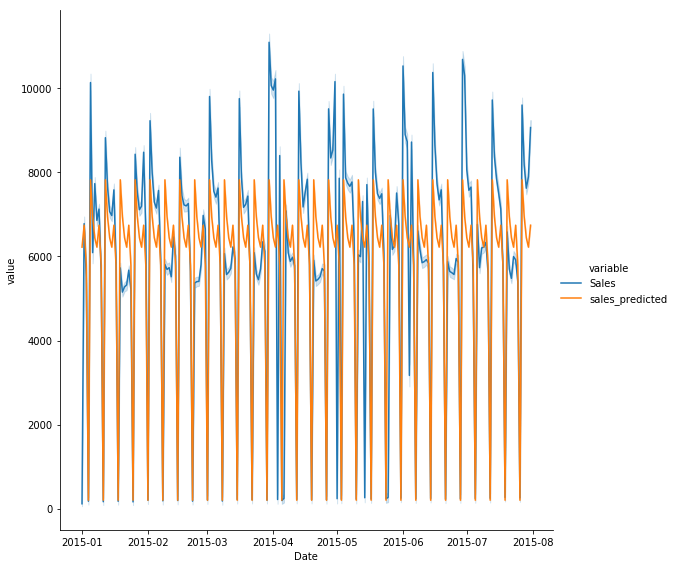

In [15]:
sns.relplot(x='Date', y='value', hue='variable', kind='line', data=y_test, height=8)
plt.show()

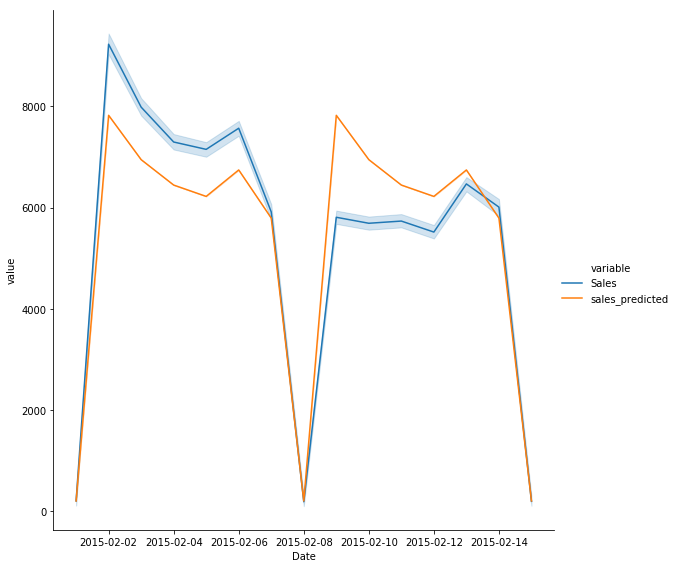

In [16]:
sns.relplot(
    x='Date',
    y='value',
    hue='variable',
    kind='line',
    data=y_test.loc[(y_test['Date'] >= '2015-02-01') & (y_test['Date'] <= '2015-02-15')],
    height=8
)
plt.show()

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [18]:
average_sales = df.groupby('Date')['Sales'].mean()

In [19]:
y_train = average_sales.loc[:'2015-01-01']

In [20]:
regressor = SimpleExpSmoothing(y_train.values)

In [21]:
regressor_fit = regressor.fit(smoothing_level=.9)

In [22]:
y_test = average_sales.loc['2015-01-01':].to_frame().reset_index()
y_test['sales_predicted'] = regressor_fit.predict(start=3, end=y_test.shape[0] + 2)

In [23]:
y_test = y_test.melt(id_vars=['Date'], value_vars=['Sales', 'sales_predicted'])

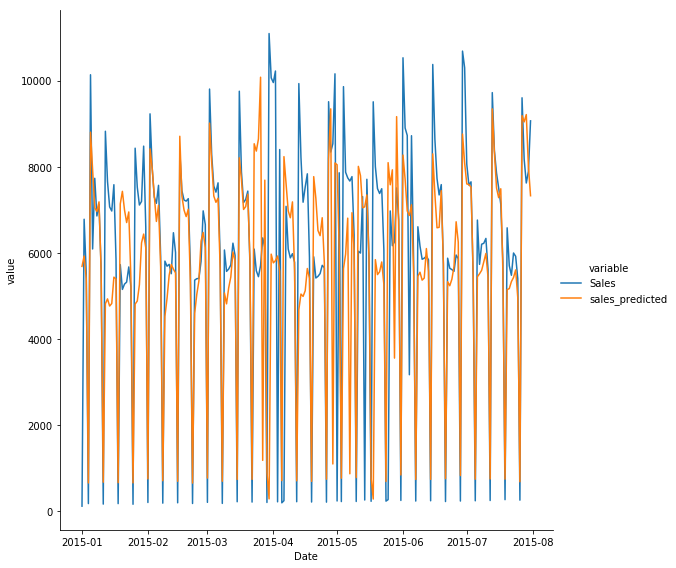

In [24]:
sns.relplot(x='Date', y='value', hue='variable', kind='line', data=y_test, height=8)
plt.show()

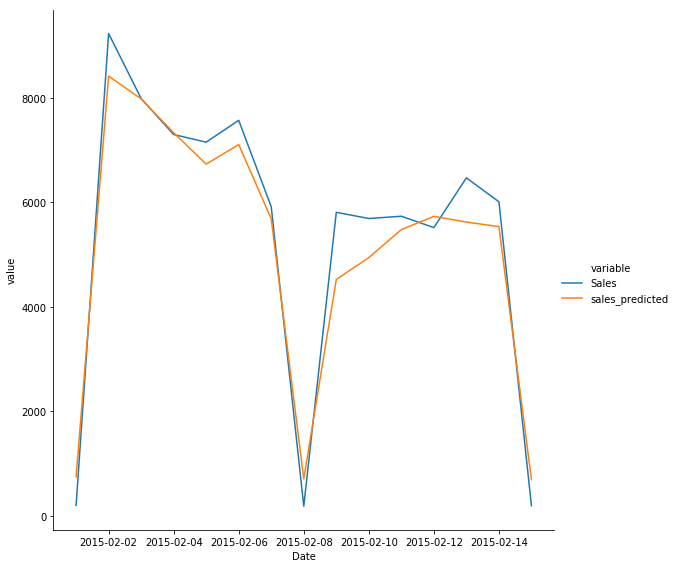

In [25]:
sns.relplot(
    x='Date',
    y='value',
    hue='variable',
    kind='line',
    data=y_test.loc[(y_test['Date'] >= '2015-02-01') & (y_test['Date'] <= '2015-02-15')],
    height=8
)
plt.show()

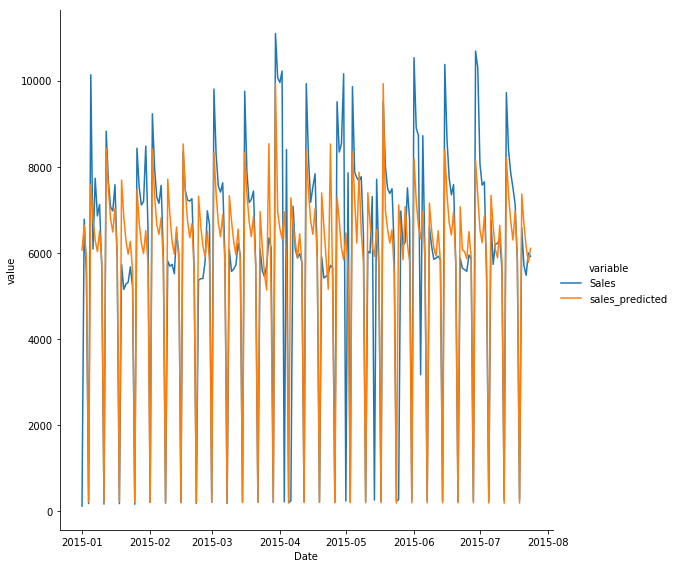

In [26]:
average_sales = average_sales.to_frame()
average_sales = average_sales.reset_index()
average_sales = average_sales.join(pd.get_dummies(average_sales['Date'].dt.weekday_name))
average_sales['sales_last_week'] = average_sales['Sales'].shift(-7)
average_sales = average_sales.dropna()
X_train, y_train = average_sales.loc[average_sales['Date'] < '2015-01-01', ['sales_last_week'] + weekdays], average_sales.loc[average_sales['Date'] < '2015-01-01', 'Sales']
X_test, y_test = average_sales.loc[average_sales['Date'] >= '2015-01-01', ['sales_last_week'] + weekdays], average_sales.loc[average_sales['Date'] >= '2015-01-01', ['Date', 'Sales']]
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)
y_test['sales_predicted'] = regressor.predict(X_test)
y_test = y_test.melt(id_vars=['Date'], value_vars=['Sales', 'sales_predicted'])
sns.relplot(x='Date', y='value', hue='variable', kind='line', data=y_test, height=8)
plt.show()

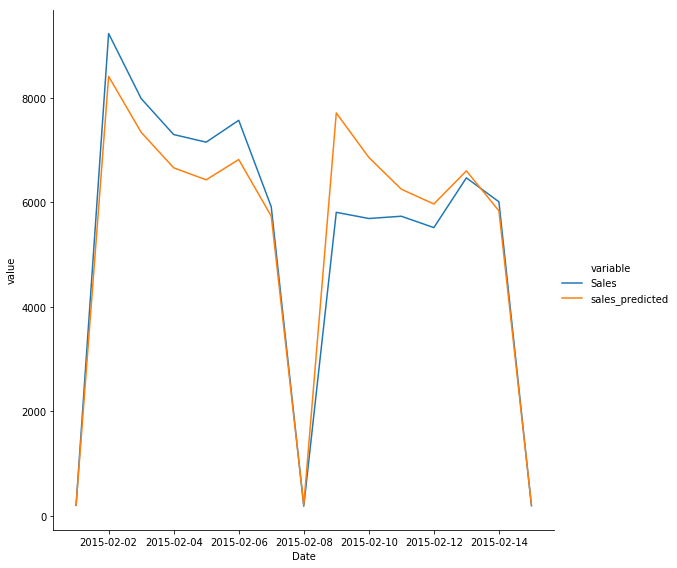

In [27]:
sns.relplot(
    x='Date',
    y='value',
    hue='variable',
    kind='line',
    data=y_test.loc[(y_test['Date'] >= '2015-02-01') & (y_test['Date'] <= '2015-02-15')],
    height=8
)
plt.show()

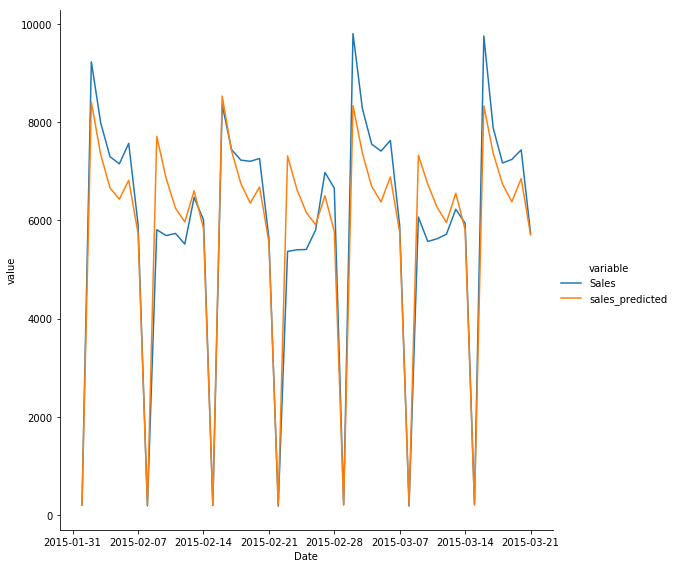

In [28]:
sns.relplot(
    x='Date',
    y='value',
    hue='variable',
    kind='line',
    data=y_test.loc[(y_test['Date'] >= '2015-02-01') & (y_test['Date'] <= '2015-03-21')],
    height=8
)
plt.show()